When agents interact with the environment, the environmental state is associated with the entire space, not a specific agent. The state dynamically changes based on the agents' actions, or spontaneously.

In [1]:
n = 1000 # number of agents
w = 100 # num of rows/cols in spatial array

In [11]:
import numpy as np

class Agent:
    def __repr__(self):
        return f"Agent({self.x}, {self.y})"

def initialize():
    global agents, env, nextenv

    agents = []
    for i in range(n):
        ag = Agent()
        ag.x = np.random.randint(0, w)
        ag.y = np.random.randint(0, w)
        agents.append(ag)

    env = np.zeros([w, w])
    nextenv = np.zeros_like(env)

initialize()

Describe dynamics of the environment

In [16]:
import matplotlib.pyplot as plt

k = 1 # rate of cAMP decay
Dc = 0.001 # diffusion constants of cAMP
Dh = 0.01 # spatial resolution for cAMP simulation
Dt = 0.01 # time resolution for cAMP simulation

def update():
    global agents, env, nextenv

    # simulating diffusion and evaporation of cAMP
    for x in range(w):
        for y in range(w):
            C = env[x,y]
            R = env[(x+1)%w,y]
            L = env[(x-1)%w,y]
            U = env[x,(y+1)%w]
            D = env[x,(y-1)%w]
            lap = (R + L + U + D - 4 * C) / (Dh**2) # Laplacian
            nextenv[x,y] = env[x,y] + (-k * C + Dc * lap) * Dt

    env, nextenv = nextenv, env


    # simulate secretion of cAMP by Agents
    f = 1 # rate of cAMP secretion by an Agent
    for ag in agents:
        env[ag.x, ag.y] += f* Dt

    # simulate chemotaxis of agents
    for ag in agents:
        newx, newy = (ag.x + np.random.randint(-1, 2)) % w, (ag.y + np.random.randint(-1, 2)) % w
        diff = (env[newx, newy] - env[ag.x, ag.y]) / 0.1
        if np.random.rand() < np.exp(diff) / (1 + np.exp(diff)):
            ag.x, ag.y = newx, newy

    
def observe():
    global agents, env, nextenv
    plt.imshow(env, cmap='binary', vmin=0, vmax=1)
    x = [ag.x for ag in agents]
    y = [ag.y for ag in agents]
    plt.plot(y, x, 'b.')

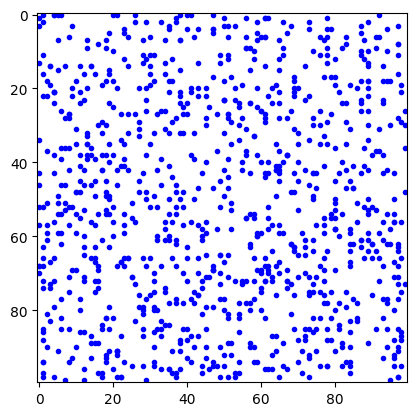

In [17]:
initialize()
observe()

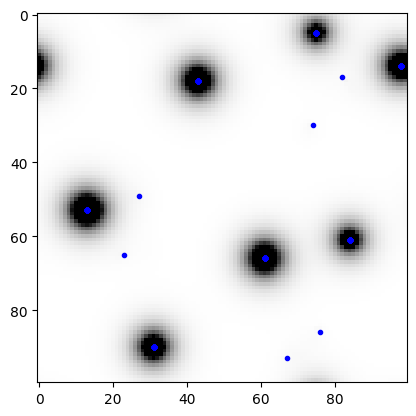

In [24]:
for _ in range(5_000):
    update()
observe()

# Garbage Collection by Ants

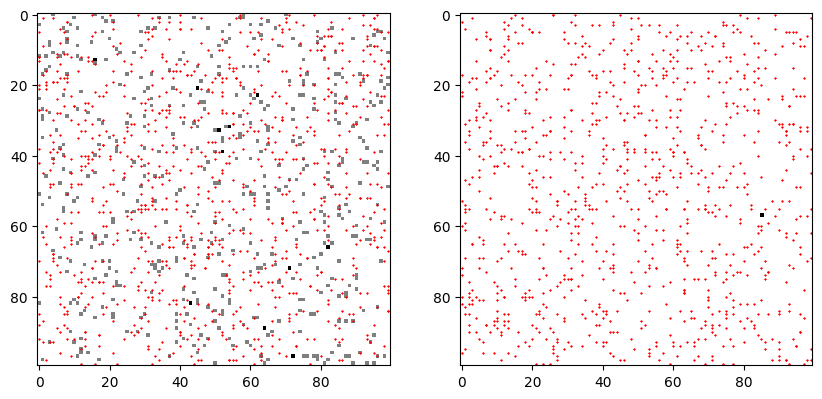

In [58]:
import matplotlib.pyplot as plt
import numpy as np


n_a = 1_000 # number of ants
n_g = 500 # number of garbage pieces
w = 100


class Ant(Agent):
    def __init__(self):
        self.x = np.random.randint(0, w)
        self.y = np.random.randint(0, w)
        self.holding = False
    
    def move(self):
        """Move randomly."""
        # select a direction randomly
        # print("moving")
        mv = np.random.choice(range(4))
        if mv == 0:
            self.y = (self.y + 1) % w
        elif mv == 1:
            self.y = (self.y - 1) % w
        elif mv == 2:
            self.x = (self.x - 1) % w
        elif mv == 3:
            self.x = (self.x + 1) % w

def initialize():
    global agents, env, nextenv
    agents = [Ant() for _ in range(n_a)]

    # create garbage
    env = np.zeros([w, w])
    for _ in range(n_g):
        x, y = np.random.randint(w, size=2)
        env[x,y] += 1


def observe(ax = None):
    global agents, env
    if ax is None:
        _, ax = plt.subplots()
    ax.imshow(env, cmap='binary')
    x = [ag.x for ag in agents]
    y = [ag.y for ag in agents]
    ax.plot(y, x, 'r*', markersize=1)


def update():
    global agents, env, nextenv

    for idx, ant in enumerate(agents):
        # move randomly
        ant.move()

        # if encounters a garbage
        if env[ant.x, ant.y] != 0:
            if ant.holding:
                # if holding, drop piece
                ant.holding = False
                env[ant.x, ant.y] += 1
            else:
                # if not holding, pick up a piece
                ant.holding = True
                env[ant.x, ant.y] -= 1



fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

initialize()

# fig, ax = plt.subplots(figsize=(5, 5))
observe(ax[0])
for _ in range(4000):
    update()

# fig, ax = plt.subplots(figsize=(5, 5))
observe(ax[1])
plt.show()